# Wordle Solver v1.0

## Libs

In [4]:
from collections import Counter
import math
from tqdm import tqdm
import unicodedata
import matplotlib.pyplot as plt

## Load Words

In [81]:
tr = 'fiveletter.txt'
en = "sgb-words.txt"

with open(tr, 'r', encoding='utf-8') as file:
    words = [kelime.strip() for kelime in file.readlines()]

## Information Theory

### Entropy

In [6]:
def calculate_feedback(guess, answer):
    feedback = [''] * len(guess)
    answer_chars_used = [False] * len(answer)  # Track which characters in the answer are used

    # First pass: Handle 'green' (correct letter in the correct position)
    for i in range(len(guess)):
        if guess[i] == answer[i]:
            feedback[i] = 'green'
            answer_chars_used[i] = True

    # Second pass: Handle 'yellow' (correct letter in the wrong position)
    for i in range(len(guess)):
        if feedback[i] == '':  # If not already marked as 'green'
            for j in range(len(answer)):
                if guess[i] == answer[j] and not answer_chars_used[j]:
                    feedback[i] = 'yellow'
                    answer_chars_used[j] = True
                    break

    # Any remaining letters should be 'gray'
    for i in range(len(guess)):
        if feedback[i] == '':
            feedback[i] = 'gray'

    return feedback

In [84]:
# LETTER FREQUENCY

# Initialize a dictionary to store letter frequencies
letter_frequency = {}

# Calculate frequency of each letter in the word list
for word in words:
    for letter in word:
        if letter in letter_frequency:
            letter_frequency[letter] += 1
        else:
            letter_frequency[letter] = 1

# Sort the frequency list in descending order
sorted_letter_frequency = dict(sorted(letter_frequency.items(), key=lambda item: item[1], reverse=True))

sorted_letter_frequency

{'a': 3580,
 'e': 2359,
 'i': 1992,
 'k': 1826,
 'r': 1556,
 'l': 1429,
 'm': 1343,
 't': 1269,
 'n': 1254,
 's': 1163,
 'u': 953,
 'ı': 879,
 'o': 797,
 'ü': 696,
 'z': 674,
 'y': 669,
 'd': 646,
 'b': 644,
 'h': 562,
 'ş': 550,
 'ç': 534,
 'p': 488,
 'g': 430,
 'v': 416,
 'f': 404,
 'c': 383,
 'ö': 272,
 'ğ': 158,
 'j': 51,
 '\x85': 3}

In [87]:
def calculate_entropy(guess, word_list):
    feedback_counts = Counter()

    for word in word_list:
        feedback = tuple(calculate_feedback(guess, word))
        feedback_counts[feedback] += 1
        # Word Freq. Weighted Entropy
        for ch in word:
            feedback_counts[feedback] += sorted_letter_frequency[ch]/len(word_list)
        

    total_words = len(word_list)
    entropy = 0

    for feedback, count in feedback_counts.items():
        probability = count / total_words
        entropy -= probability * math.log2(probability)

    return entropy

In [86]:
def find_top_guesses(word_list):
    entropy_scores = []

    for word in tqdm(word_list, desc="Calculating Entropy", colour="blue"):  # Adding a progress bar
        entropy = calculate_entropy(word, word_list)
        entropy_scores.append((word, entropy))

    # Sort by entropy in descending order and get the top 10
    entropy_scores.sort(key=lambda x: x[1], reverse=True)
    top_10_guesses = entropy_scores[:10]

    return top_10_guesses

In [79]:
def update_word_list(guess, feedback, word_list):
    updated_list = []
    for word in word_list:
        if calculate_feedback(guess, word) == feedback:
            updated_list.append(word)
    return updated_list

## Solver w/ Input

In [131]:
def interactive_wordle_solver(word_list):
    step = 0
    word_list_c = word_list[:]
    top_10_guesses_c = find_top_guesses(word_list_c)
    game_is_done = False
    while True:
        step += 1
        if len(word_list_c) == len(word_list):
            top_10_guesses = top_10_guesses_c[:]
        else:
            top_10_guesses = find_top_guesses(word_list_c)
        print("\nTop 10 Suggested Guesses:", f"Step:{step}")
        for word, score in top_10_guesses:
            print(f"{word}: {score:.4f}")

        # User inputs their actual guess and feedback
        user_guess = input("\nEnter your guess: ").strip().lower()
        print(f"\nENTERED USER GUESS: {user_guess}")
        feedback = input("Enter feedback (g for green, y for yellow, x for gray): ").strip().lower()
        print(f"ENTERED USER FEEDBACK: {feedback}\n")

        # Convert feedback to a list format
        feedback_list = []
        for char in feedback:
            if char == 'g':
                feedback_list.append('green')
            elif char == 'y':
                feedback_list.append('yellow')
            else:
                feedback_list.append('gray')

        # Update the word list based on the feedback
        word_list_c = update_word_list(user_guess, feedback_list, word_list_c)

        # If only one word remains, suggest it as the final answer
        if len(word_list_c) == 1:
            print(f"\nThe answer is: {word_list_c[0]}")
            game_is_done = True
        elif not word_list_c:
            print("\nNo words left that match the feedback. Please check your input.")
            game_is_done = True
        
        if game_is_done:
            prompt = input("\nType q for quit, r for restart from beginning")
            
            if prompt == "q":
                break
            if prompt == "r":
                word_list_c = word_list[:]
                step = 0
                game_is_done = False

interactive_wordle_solver(words)

Calculating Entropy: 100%|██████████| 5596/5596 [01:18<00:00, 71.58it/s]



Top 10 Suggested Guesses: Step:1
tarik: 10.8820
merak: 10.8345
kamer: 10.7567
malik: 10.7550
talik: 10.6979
serak: 10.6975
kamil: 10.6916
kelam: 10.6885
kenar: 10.6729
kalem: 10.6586

ENTERED USER GUESS: tarik
ENTERED USER FEEDBACK: yxxgx



Calculating Entropy: 100%|██████████| 54/54 [00:00<00:00, 5456.20it/s]



Top 10 Suggested Guesses: Step:2
mitil: -422.7436
metis: -423.9855
yitim: -424.5051
metil: -431.1800
limit: -438.7025
istim: -439.6098
metin: -442.9552
metin: -442.9552
yetim: -443.7386
bitim: -444.7675

ENTERED USER GUESS: mitil
ENTERED USER FEEDBACK: gxygx



Calculating Entropy: 100%|██████████| 3/3 [00:00<00:00, 28339.89it/s]



Top 10 Suggested Guesses: Step:3
mucit: -18488.8548
muhit: -18488.8548
müfit: -19829.1975

ENTERED USER GUESS: 
ENTERED USER FEEDBACK: 



Calculating Entropy: 100%|██████████| 3/3 [00:00<00:00, 21254.92it/s]



Top 10 Suggested Guesses: Step:4
mucit: -18488.8548
muhit: -18488.8548
müfit: -19829.1975


KeyboardInterrupt: Interrupted by user

## Simulation

In [28]:
def find_top_guesses_for_sim(word_list):
    entropy_scores = []

    for word in word_list:
        entropy = calculate_entropy(word, word_list)
        entropy_scores.append((word, entropy))
        

    # Sort by entropy in descending order and get the top 10
    entropy_scores.sort(key=lambda x: x[1], reverse=True)
    top_10_guesses = entropy_scores[:10]

    return top_10_guesses

### Find Avg. Step of Specific Start Word

In [69]:
def simulate_solver_for_word(target_word, word_list, first_word):
    steps = 0
    current_word_list = word_list[:]
    
    while True:
        if steps == 0:
            best_guess = first_word
            steps += 1
        else:
            best_guess = find_top_guesses_for_sim(current_word_list)[0][0]
            steps += 1
        
        if best_guess == target_word:
            return steps 
        
        feedback = calculate_feedback(best_guess, target_word)
        current_word_list = update_word_list(best_guess, feedback, current_word_list)

def calculate_steps_for_all_words(word_list, first_word_list):
    step_dict = {}
    for fwi in range(len(first_word_list)):
        print(f"Started {fwi+1}. word of {len(first_word_list)}")
        step_hist = []
        total = 0
        for word in tqdm(word_list, desc="Calculating Steps for Each Word", colour="yellow"):
            steps = simulate_solver_for_word(word, word_list, first_word_list[fwi])
            step_hist.append(steps)
            total += steps
        
        step_dict[first_word_list[fwi]] = {"step_hist": step_hist, "avg": total/len(word_list)}
        print(f"Ended {fwi+1}. word of {len(first_word_list)}")
        
    return step_dict

In [99]:
first_words = ["tarik", "merak", "kalem", "kamer", "kenar", "yumak", "serak", "irade"]

step_dict = calculate_steps_for_all_words(words, first_words)

Started 1. word of 8


Calculating Steps for Each Word: 100%|██████████| 5596/5596 [16:31<00:00,  5.64it/s]


Ended 1. word of 8
Started 2. word of 8


Calculating Steps for Each Word: 100%|██████████| 5596/5596 [15:26<00:00,  6.04it/s]


Ended 2. word of 8
Started 3. word of 8


Calculating Steps for Each Word: 100%|██████████| 5596/5596 [16:19<00:00,  5.71it/s]


Ended 3. word of 8
Started 4. word of 8


Calculating Steps for Each Word: 100%|██████████| 5596/5596 [14:18<00:00,  6.52it/s]


Ended 4. word of 8
Started 5. word of 8


Calculating Steps for Each Word: 100%|██████████| 5596/5596 [16:05<00:00,  5.80it/s]  


Ended 5. word of 8
Started 6. word of 8


Calculating Steps for Each Word: 100%|██████████| 5596/5596 [1:14:00<00:00,  1.26it/s] 


Ended 6. word of 8
Started 7. word of 8


Calculating Steps for Each Word: 100%|██████████| 5596/5596 [31:22<00:00,  2.97it/s]    


Ended 7. word of 8
Started 8. word of 8


Calculating Steps for Each Word: 100%|██████████| 5596/5596 [1:26:54<00:00,  1.07it/s]  

Ended 8. word of 8


### Plot of Words

In [128]:
def plot_integer_histogram(integer_list, word, avg):
    counter = Counter(integer_list)
    
    # Extracting the integers and their counts
    x = list(counter.keys())
    y = list(counter.values())

    result = {}

    sum_y = 0
    for i in range(len(x)):
        if x[i] < 7: 
            label = f"{x[i]}"
            value = y[i]
            result[label] = value
        else:
            label = 'X'
            sum_y += y[i]
        
    if sum_y > 0:
        result['X'] = sum_y

    result = dict(sorted(result.items(), key=lambda item: item[0]))
    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    bars = plt.bar(result.keys(), result.values(), color='skyblue', edgecolor='black')
    
    # Adding counts on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', 
                 ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    # Adding labels and title with styling
    plt.xlabel('Solution Step', fontsize=14, fontweight='bold')
    plt.ylabel('Word Count', fontsize=14, fontweight='bold')
    plt.title(f'Histogram of {word}, AVG={avg:.3f}', fontsize=16, fontweight='bold')
    
    # Adding gridlines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Displaying the plot
    plt.show()

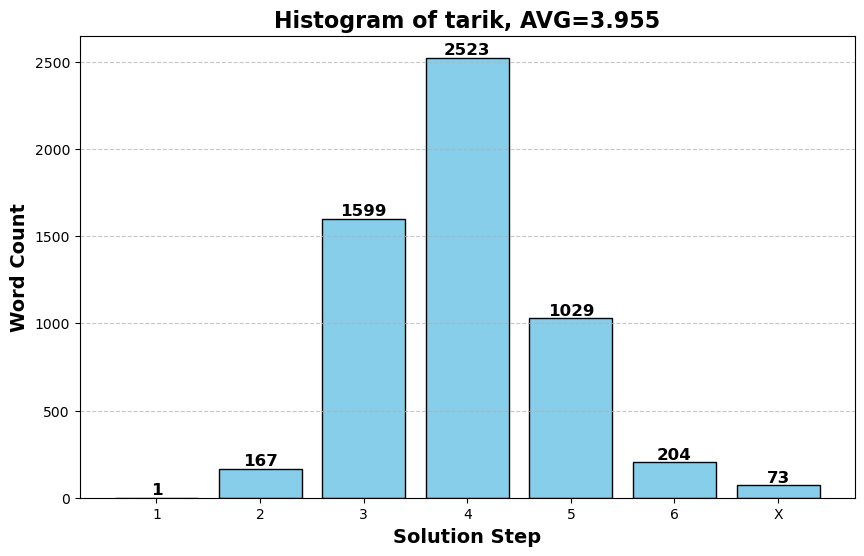

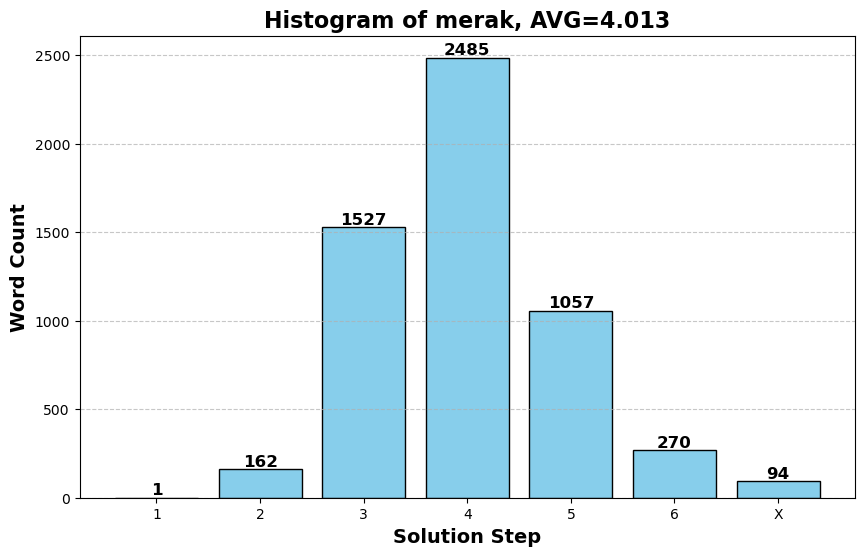

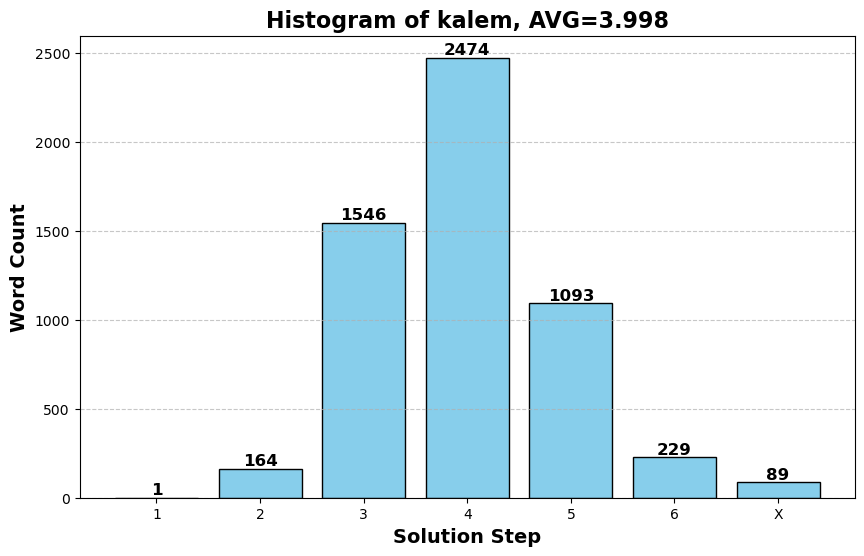

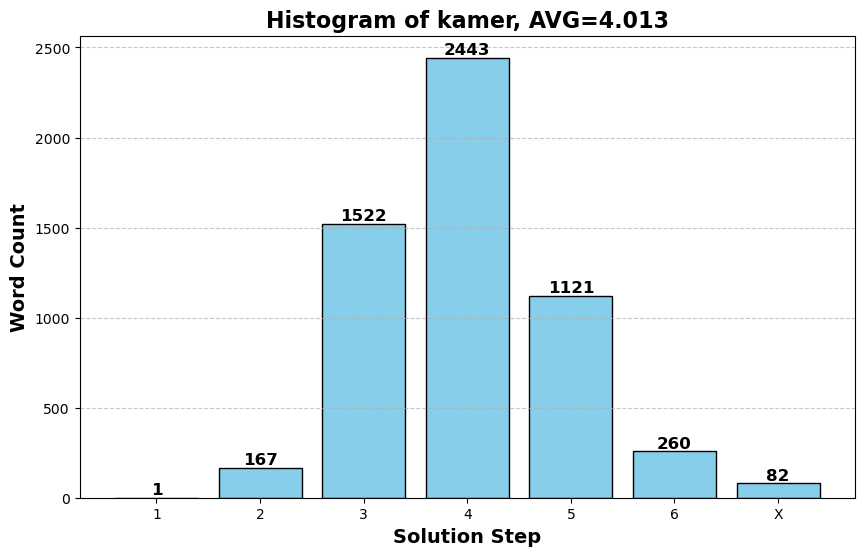

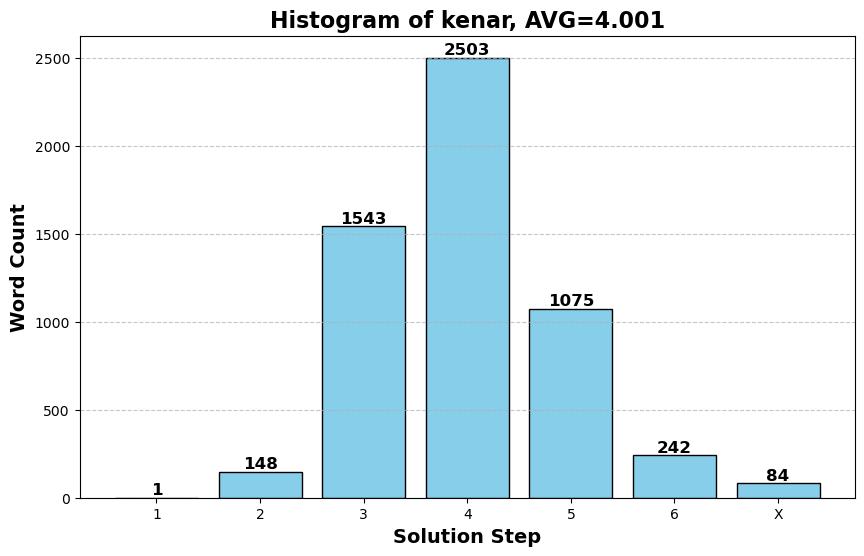

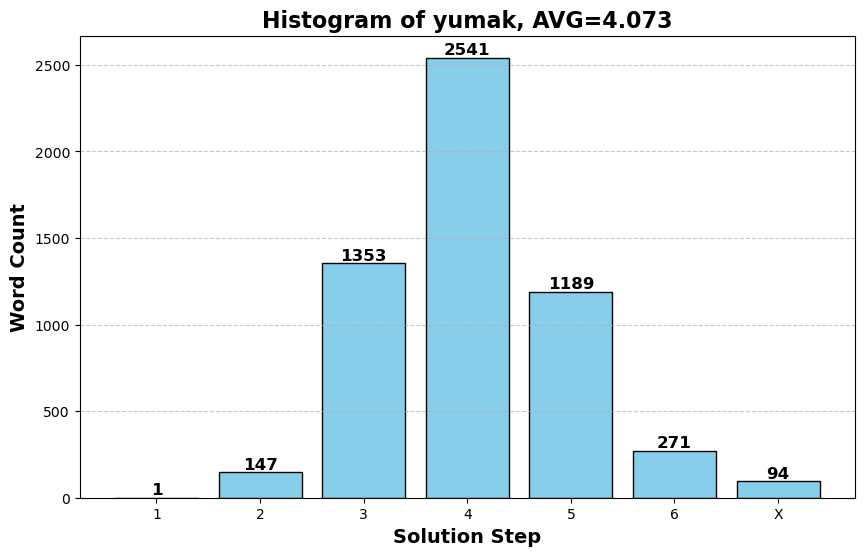

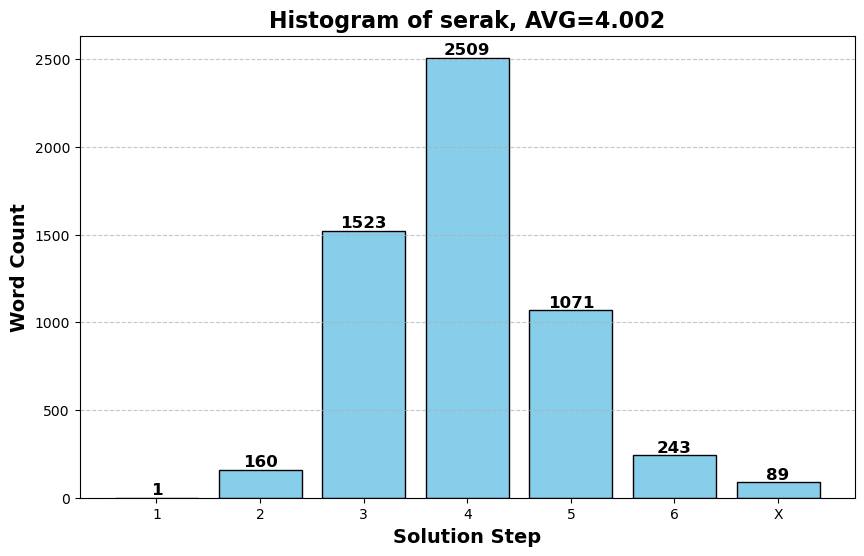

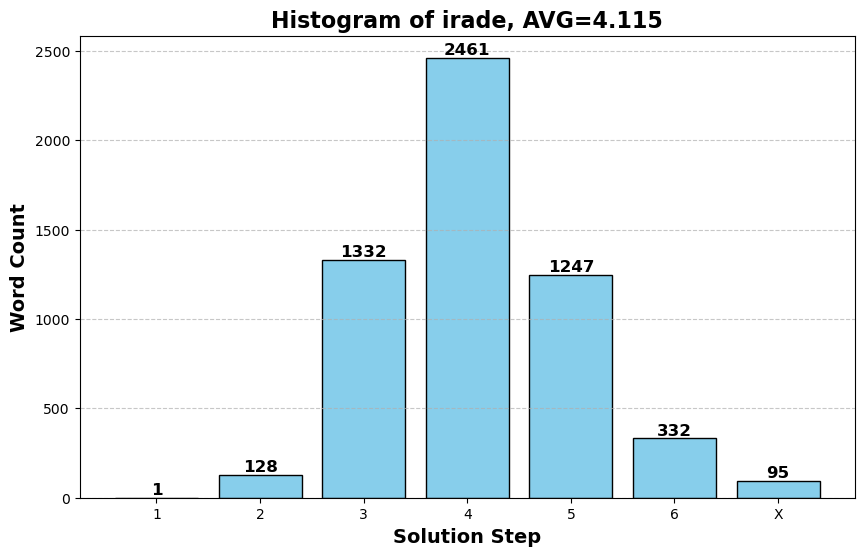

In [129]:
for first_word in first_words:
    plot_integer_histogram(step_dict[first_word]["step_hist"], first_word, step_dict[first_word]["avg"])